In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
dataset = pd.read_csv("social.csv")
del dataset['Gender']
dataset.head(5)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19.0,19000.0,0
1,15810944,35.0,20000.0,0
2,15668575,26.0,43000.0,0
3,15603246,27.0,57000.0,0
4,15804002,19.0,76000.0,0


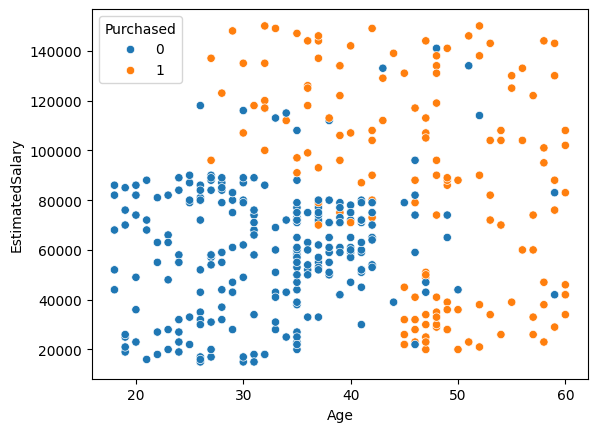

In [8]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [4]:
dataset.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [9]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 10)  # as we will change the value of n_neighbor the accuracy will also change

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
knn.score(x_test,y_test)*100

95.0

In [28]:
knn.score(x_train,y_train)*100

91.5625

In [32]:
# To get right value of nighbors in order to train our odel at its best scenario

for i in range(1,30):
    knn1 = KNeighborsClassifier()
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 91.5625 93.75
2 91.5625 93.75
3 91.5625 93.75
4 91.5625 93.75
5 91.5625 93.75
6 91.5625 93.75
7 91.5625 93.75
8 91.5625 93.75
9 91.5625 93.75
10 91.5625 93.75
11 91.5625 93.75
12 91.5625 93.75
13 91.5625 93.75
14 91.5625 93.75
15 91.5625 93.75
16 91.5625 93.75
17 91.5625 93.75
18 91.5625 93.75
19 91.5625 93.75
20 91.5625 93.75
21 91.5625 93.75
22 91.5625 93.75
23 91.5625 93.75
24 91.5625 93.75
25 91.5625 93.75
26 91.5625 93.75
27 91.5625 93.75
28 91.5625 93.75
29 91.5625 93.75


C:\Users\yashn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


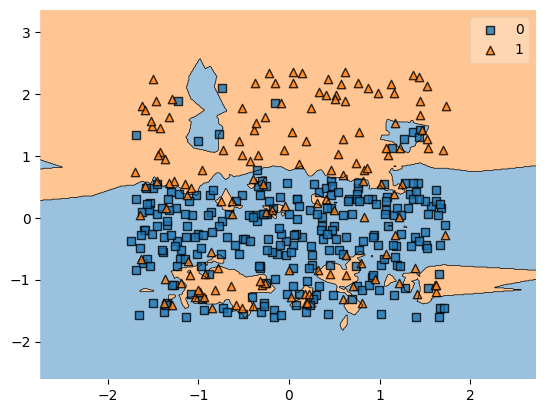

In [46]:
# we need to fix the features to which out data is training otherwise it will mismmatch and give error

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x.iloc[:, [0, 2]], y)  # Train with 2 features
plot_decision_regions(x.iloc[:, [0, 2]].to_numpy(), y.to_numpy(), clf=knn)
plt.show()
